In [83]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [84]:
# path to dataset directory
DATASET = "./code/Covid19-dataset"

In [85]:
# Initialize variables to store subset sizes and image shapes
subset_sizes = {}
subset_image_shapes = {}

# List of subsets (test and train)
subsets = ["test", "train"]

# Iterate through the subsets
for subset in subsets:
    subset_dir = os.path.join(DATASET, subset)

    # Initialize variables to store image shapes within the subset
    subset_image_shapes[subset] = []

    # Initialize a variable to count the number of images in the subset
    num_images = 0
    total_size = 0

    # Iterate through the "covid" and "normal" subdirectories within the subset
    for category in ["Covid", "Normal"]:
        category_dir = os.path.join(subset_dir, category)

        # Iterate through image files in the category
        for file in os.listdir(category_dir):
            # Create the full path to the image file
            image_path = os.path.join(category_dir, file)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Get the shape of the image (height, width, and channels)
            height, width, channels = image.shape

            # Add the image shape to the list for the current subset
            subset_image_shapes[subset].append((height, width, channels))

            # Increment the number of images in the subset
            num_images += 1
            total_size += os.path.getsize(image_path)

    # Total size in MB
    total_size_mb = total_size / (1024 * 1024)
    # Store the size of the subset (number of images)
    subset_sizes[subset] = {
        "Number of images" : num_images,
        "Total Size": total_size_mb
    }

In [86]:
# Print the subset sizes with image size in megabytes (MB)
for subset, info in subset_sizes.items():
    print(f"{subset.capitalize()} Subset Size:")
    for key, value in info.items():
        print(f"  {key}: {value:.2f} MB")  # Display size with two decimal places for MB

Test Subset Size:
  Number of images: 46.00 MB
  Total Size: 12.80 MB
Train Subset Size:
  Number of images: 181.00 MB
  Total Size: 126.18 MB


In [87]:
# Print the first 5 image shapes for the "Test" subset

shapes = subset_image_shapes["test"]

print(f"Test Subset Image Shapes:")
for i, shape in enumerate(shapes, start=1):
    if i>5: break
    height, width, channels = shape
    print(f"  Image {i}: Height={height}, Width={width}, Channels={channels}")

Test Subset Image Shapes:
  Image 1: Height=1146, Width=1262, Channels=3
  Image 2: Height=557, Width=556, Channels=3
  Image 3: Height=362, Width=439, Channels=3
  Image 4: Height=448, Width=425, Channels=3
  Image 5: Height=400, Width=523, Channels=3


In [88]:
# Print the first 5 image shapes for the "train" subset
shapes = subset_image_shapes["train"]

print(f"Train Subset Image Shapes:")
for i, shape in enumerate(shapes, start=1):
    if i>5: break
    height, width, channels = shape
    print(f"  Image {i}: Height={height}, Width={width}, Channels={channels}")

Train Subset Image Shapes:
  Image 1: Height=4032, Width=3024, Channels=3
  Image 2: Height=557, Width=556, Channels=3
  Image 3: Height=2336, Width=2836, Channels=3
  Image 4: Height=1668, Width=1641, Channels=3
  Image 5: Height=1703, Width=1690, Channels=3


In [89]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [90]:
normal_images = list(paths.list_images(f"{DATASET}/train/Normal"))
covid_images = list(paths.list_images(f"{DATASET}/train/Covid"))

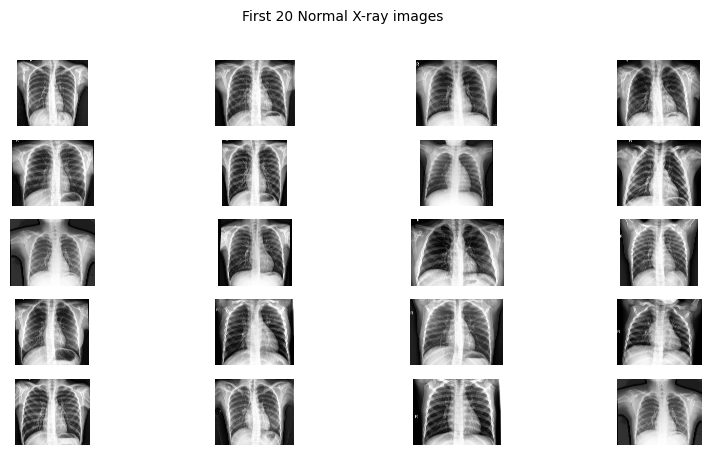

In [91]:
plots_from_files(normal_images[:20], rows=5, maintitle="First 20 Normal X-ray images")

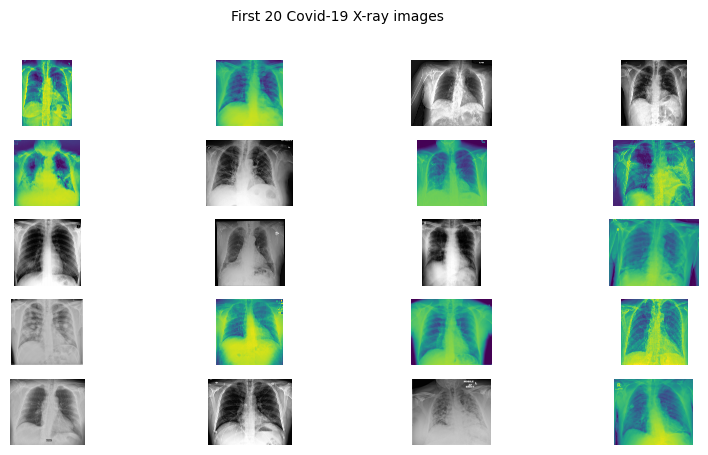

In [92]:
plots_from_files(covid_images[:20], rows=5, maintitle="First 20 Covid-19 X-ray images")

In [106]:
imagePaths = list(paths.list_images(DATASET+"/train"))

data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)

In [107]:
print(labels)

['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Covid' 'Covid'
 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid'
 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid'
 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid'
 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid'
 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'Cov

In [108]:
# perform one-hot encoding on the labels
label_binarizer = LabelBinarizer()

# Fit and transform the labels
one_hot_labels = label_binarizer.fit_transform(labels)
target_labels = to_categorical(one_hot_labels)
target_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# COVID-19 Chest X-ray Image Classifier

## Introduction

Planning to employ deep learning model for COVID-19 prediction using chest X-ray images. The model uses the entire image for prediction, and each image is classified into one of two categories: "Covid" or "Normal." The target variable for the classification task can take one of these values: "Covid" or "Normal."

## Model Overview

We employ a deep learning model to perform the classification task. The model has been trained on a dataset containing chest X-ray images labeled as "Covid" or "Normal." It leverages the unique features present in these images to make accurate predictions.

## Usage

Planning to  create a user-friendly web application interface that allows users to upload their own chest X-ray images and test whether they have COVID-19 or not.
